In [1]:
import copy
import random
from itertools import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

class Coord():
    x = 0.0
    y = 0.0

In [74]:
def init(n : int = None, Pmax : int = None, Truck_capacity : int = None, Drone_capacity : int = None, Positions : list[Coord] = None, Requests_size : list[int] = None, Truck_costs : np.ndarray = None, Drone_costs : np.ndarray = None):
    if n == None :
        n : int
        n = np.random.randint(5,8)
    print("n = ", n)
    if Truck_capacity == None :
        Truck_capacity : int
        Truck_capacity = np.random.randint(10,15)
        print("Truck cap = ", Truck_capacity)
    if Drone_capacity == None :
        Drone_capacity : int
        Drone_capacity = np.random.randint(5,10)
        print("Drone cap = ", Drone_capacity)
    print("Ici:", Positions)
    print(type(Positions))
    if Positions == None :
        Positions = []
        for i in range(n+1):
            a = Coord()
            Positions.append(a)
        print(type(Positions))
        print(type(Positions[n]))
        print(Positions)
        Positions[n].x = 0.
        Positions[n].y = 0.
        print(Positions[n])
        for i in range(n):
            Positions[i].x = np.random.uniform(-100., 100.)
            Positions[i].y = np.random.uniform(-100., 100.)
        Truck_costs = np.empty([n+1,n+1])
        Drone_costs = np.empty([n+1,n+1])
        Fly_Distances = np.empty([n+1,n+1])
        for i in range(n+1):
            for j in range(n+1):
                Fly_Distances[i][j] = np.sqrt(np.sum(np.square([Positions[i].x - Positions[j].x, Positions[i].y - Positions[j].y])))
                q_t = np.random.uniform(1.1,2)
                Truck_costs[i][j] = np.random.randint(Fly_Distances[i][j] +1, Fly_Distances[i][j]*q_t + 2)
                #q_d = np.random.uniform(1.01,q_t)
                Drone_costs[i][j] = np.random.randint(Fly_Distances[i][j]*0.6, Truck_costs[i][j])
    if Requests_size == None :
        Requests_size : list[int]
        R = 10
        Requests_size = list(np.random.randint(5,R) for i in range(n))
    print(Requests_size)
    P : int
    if Pmax == None :
        P = n
    elif Pmax < n :
        P = Pmax
    else :
        P = n
    #P = 3
    print("P = ", P)
    Flying_range : int
    Flying_range = np.random.randint(200,250)
    return P, n, Positions, Fly_Distances, Truck_costs, Drone_costs, Truck_capacity, Drone_capacity, Requests_size, Flying_range
    #return P, n, Positions, Fly_Distances, Truck_costs, Truck_capacity, Requests_size



n =  7
Truck cap =  12
Drone cap =  5
Ici: None
<class 'NoneType'>
<class 'list'>
<class '__main__.Coord'>
[<__main__.Coord object at 0x000001F315B00290>, <__main__.Coord object at 0x000001F315B00710>, <__main__.Coord object at 0x000001F315B00440>, <__main__.Coord object at 0x000001F31280DC70>, <__main__.Coord object at 0x000001F3159947A0>, <__main__.Coord object at 0x000001F315996F00>, <__main__.Coord object at 0x000001F315995FD0>, <__main__.Coord object at 0x000001F3159953D0>]
[8, 8, 8, 7, 5, 5, 5]
P =  7
[[0, 8, 'T'], [1, 8, 'T'], [2, 8, 'T'], [3, 7, 'T'], [4, 5, 'T'], [5, 5, 'T'], [6, 5, 'T']]
debut k=0 j = 0 size = 1
deliveries = [[[0, 8, 'T']]]
size deliveries = 1
fin k=0, truck load = 8 capacity = 12

debut k=0 j = 1 size = 1
deliveries = [[[0, 8, 'T']], [[1, 8, 'T']]]
size deliveries = 2
fin k=1, truck load = 8 capacity = 12

debut k=0 j = 2 size = 2
deliveries = [[[0, 8, 'T']], [[1, 8, 'T']], [[2, 8, 'T']]]
size deliveries = 3
fin k=2, truck load = 8 capacity = 12

debut k=0 j

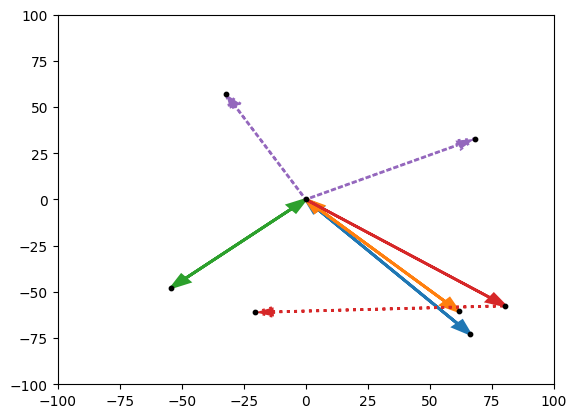

In [75]:

def init_sol(P, n, Positions, Fly_Distances, Truck_capacity, Drone_capacity, Requests_size, Flying_range):
    deliveries = [[]]
    #truck_deliver = np.empty([P])
    #drone_deliver = np.empty([P])
    truck_load = [[]]
    #truck_passing = np.empty([truck]*P)
    #drone_passing = np.empty([P,list[int]])
    Requests_tri = []
    for j in range(n):
        Requests_tri.append([])
        Requests_tri[j] = [j, Requests_size[j], 'T']
    Requests_tri.sort(key = lambda a:a[1], reverse = True)
    print(Requests_tri)
    k = 0
    truck_load[k] = 0
    for j in range(n):
        k = 0 
        print(f"debut k={k} j = {j} size = {len(truck_load)}")
        while (truck_load[k] + Requests_tri[j][1] > Truck_capacity) :
            k += 1
            if((k == len(deliveries)) and (k <= P)):
                truck_load.append(0)
                deliveries.append([])
            if(k > P):
                print("error no initial solution found" )
                return 0
        deliveries[k].append(Requests_tri[j])
        truck_load[k] += Requests_tri[j][1]
        print(f"deliveries = {deliveries}")
        print(f"size deliveries = {len(deliveries)}")
        print(f"fin k={k}, truck load = {truck_load[k]} capacity = {Truck_capacity}")
        print()

    for k in range(len(deliveries)):
        print(deliveries[k])
        for j in range(len(deliveries[k])):
            print(deliveries[k][j])
            print(j)
            print(len(deliveries[k]))
            if((deliveries[k][j][1] <= Drone_capacity)):
                if(j == 0):
                    if((j != len(deliveries[k]) -1) and (Fly_Distances[n][deliveries[k][j][0]] + Fly_Distances[deliveries[k][j][0]][deliveries[k][j+1][0]] <= Flying_range)):
                        deliveries[k][j][2] = 'D'
                        j += 2
                elif(j == len(deliveries[k]) -1):
                    if(Fly_Distances[deliveries[k][j-1][0]][deliveries[k][j][0]] + Fly_Distances[deliveries[k][j][0]][n] <= Flying_range):
                        deliveries[k][j][2] = 'D' 
                  
                elif(Fly_Distances[deliveries[k][j-1][0]][deliveries[k][j][0]] + Fly_Distances[deliveries[k][j][0]][deliveries[k][j+1][0]] <= Flying_range):
                    deliveries[k][j][2] = 'D'
                    j += 2

    print(deliveries)    
    last_truck_pos = n
    last_drone_pos = None
    colors = cycle(['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink','tab:gray', 'tab:olive', 'tab:cyan'])
    for k in range(len(deliveries)):
        color = next(colors)
        for j in range(len(deliveries[k])):
            #print("i : ", Positions[i].x," ; ", Positions[i].y)
            if(deliveries[k][j][2] == 'T'):
                plt.arrow(Positions[last_truck_pos].x, Positions[last_truck_pos].y, Positions[deliveries[k][j][0]].x - Positions[last_truck_pos].x, Positions[deliveries[k][j][0]].y - Positions[last_truck_pos].y, head_width=5, length_includes_head=True, color = color, linewidth = 2)
                last_truck_pos = deliveries[k][j][0]
                if(last_drone_pos != None):
                    plt.arrow(Positions[last_drone_pos].x, Positions[last_drone_pos].y, Positions[deliveries[k][j][0]].x - Positions[last_drone_pos].x, Positions[deliveries[k][j][0]].y - Positions[last_drone_pos].y, head_width=5, length_includes_head=True, linestyle=':', color = color, linewidth = 2)
                    last_drone_pos = None
                if(j == len(deliveries[k])-1):
                    plt.arrow(Positions[last_truck_pos].x, Positions[last_truck_pos].y, Positions[n].x - Positions[last_truck_pos].x, Positions[n].y - Positions[last_truck_pos].y, head_width=5, length_includes_head=True, color = color, linewidth = 2)
            if(deliveries[k][j][2] == 'D'):
                plt.arrow(Positions[last_truck_pos].x, Positions[last_truck_pos].y, Positions[deliveries[k][j][0]].x - Positions[last_truck_pos].x, Positions[deliveries[k][j][0]].y - Positions[last_truck_pos].y, head_width=5, length_includes_head=True, linestyle=':', color = color, linewidth = 2)
                last_drone_pos = deliveries[k][j][0]
                if(j == len(deliveries)-1):
                    plt.arrow(Positions[last_drone_pos].x, Positions[last_drone_pos].y, Positions[n].x - Positions[last_drone_pos].x, Positions[n].y - Positions[last_drone_pos].y, head_width=5, length_includes_head=True, linestyle=':', color = color, linewidth = 2)
                    plt.arrow(Positions[last_truck_pos].x, Positions[last_truck_pos].y, Positions[n].x - Positions[last_truck_pos].x, Positions[n].y - Positions[last_truck_pos].y, head_width=5, length_includes_head=True, color = color, linewidth = 2)
        last_truck_pos = n
        last_drone_pos = None
            
    # Draw highlighted edges for each road
    # Extended color palette

    # Drawing nodes

    Axe_x = [Positions[i].x for i in range(len(Positions))]
    Axe_y = [Positions[i].y for i in range(len(Positions))]
    print(Axe_x)
    print(Axe_y)
    plt.scatter(Axe_x, Axe_y, s=10, c='k')

    plt.xlim(-100, 100)  # X-axis values (x)
    plt.ylim(-100, 100)  # Y-axis values (y)
    # Show chart scal
    plt.axis('on')  
    plt.show()

P, n, Positions, Fly_Distances, Truck_costs, Drone_costs, Truck_capacity, Drone_capacity, Requests_size, Flying_range = init()
init_sol(P, n, Positions, Fly_Distances, Truck_capacity, Drone_capacity, Requests_size, Flying_range)

def generate_initial_solution(instance):
    """
    Génère une solution initiale aléatoire pour le CVRP.
    
    Parameters:
        instance (dict): Un dictionnaire contenant les coordonnées du dépôt, des clients, 
                         les demandes des clients, et la capacité du véhicule.
        
    Returns:
        list: Une liste de routes, où chaque route est une liste de clients visités par un véhicule.
    """
    clients = instance['clients']
    vehicle_capacity = instance['vehicle_capacity']
    
    random.shuffle(clients)
    
    solution = []
    current_route = []
    current_load = 0
    
    for client in clients:
        if current_load + client['demand'] <= vehicle_capacity:
            current_route.append(client)
            current_load += client['demand']
        else:
            solution.append(current_route)
            current_route = [client]
            current_load = client['demand']
    
    if current_route:
        solution.append(current_route)
    
    return solution

In [39]:
test = "my_list"
len(test)

7

In [400]:
def generate_initial_population(instance, population_size):
    population = []
    for _ in range(population_size):
        solution = generate_initial_solution(instance)
        population.append(solution)
    return population

In [401]:
def calcul_distance(point1, point2):
    return np.sqrt((point1['x'] - point2['x'])**2 + (point1['y'] - point2['y'])**2)

In [402]:
def evaluate_route(route, instance):
    """
    Calcule la distance totale d'une route

    Parameters:
        route (list): Une liste de clients visités par un véhicule, sans compter le dépot.
        instance (dict): Un dictionnaire contenant les coordonnées du dépôt, des clients, 
                         les demandes des clients, et la capacité du véhicule.
    
    Returns:
        float: La distance totale de la route.
    """
    
    depot = instance['depot']
    total_distance = 0
    previous_client = depot
    
    for client in route:
        total_distance += calcul_distance(previous_client, client)
        previous_client = client
    
    total_distance += calcul_distance(previous_client, depot)
    
    return total_distance

In [403]:
def evaluate_solution(solution, instance):
    """
    Calcule la distance totale d'une solution.
    
    Parameters:
        solution (list): Une liste de routes, où chaque route est une liste de clients visités par un véhicule.
        instance (dict): Un dictionnaire contenant les coordonnées du dépôt, des clients, 
                         les demandes des clients, et la capacité du véhicule.
        
    Returns:
        float: La distance totale de la solution.
    """
    
    total_distance = 0
    
    for route in solution:
        total_distance += evaluate_route(route, instance)
        
    return total_distance

In [404]:
def evaluate_population(population, instance):
    fitness_scores = []
    for solution in population:
        cost = evaluate_solution(solution, instance)
        fitness_scores.append((solution, cost))
    fitness_scores.sort(key=lambda x: x[1])  # Trier par coût croissant
    return fitness_scores

In [405]:
def select_parents(fitness_scores, num_parents):
    selected_parents = [solution for solution, _ in fitness_scores[:num_parents]]
    return selected_parents

In [406]:
def flatten_solution(solution):
    return [client for route in solution for client in route]

In [407]:
def unflatten_solution(flat_solution, instance):
    clients = flat_solution[:]
    solution = []
    current_route = []
    current_load = 0
    for client in clients:
        if current_load + client['demand'] <= instance['vehicle_capacity']:
            current_route.append(client)
            current_load += client['demand']
        else:
            solution.append(current_route)
            current_route = [client]
            current_load = client['demand']
    if current_route:
        solution.append(current_route)
    return solution

In [408]:
def crossover(parent1, parent2, instance):
    parent1_flat = flatten_solution(parent1)
    parent2_flat = flatten_solution(parent2)
    size = len(parent1_flat)
    start, end = sorted(random.sample(range(size), 2))
    child_flat = [None] * size
    child_flat[start:end] = parent1_flat[start:end]
    
    parent2_iter = iter(parent2_flat)
    for i in range(size):
        if child_flat[i] is None:
            child_flat[i] = next(c for c in parent2_iter if c not in child_flat)
    
    return unflatten_solution(child_flat, instance)

In [409]:
def mutate(solution, mutation_rate=0.01):
    for route in solution:
        if len(route) > 1 and random.random() < mutation_rate:
            i, j = sorted(random.sample(range(len(route)), 2))
            route[i], route[j] = route[j], route[i]

In [410]:
def replace_population(population, children, instance, num_elite):
    population.extend(children)
    population.sort(key=lambda x: evaluate_solution(x, instance))
    return population[:len(population) - len(children) + num_elite]

In [411]:
def genetic_algorithm(instance, population_size, num_generations, num_parents, mutation_rate, num_elite):
    population = generate_initial_population(instance, population_size)
    
    for generation in range(num_generations):
        fitness_scores = evaluate_population(population, instance)
        
        parents = select_parents(fitness_scores, num_parents)
        
        children = []
        for _ in range(population_size - num_parents):
            parent1, parent2 = random.sample(parents, 2)
            child = crossover(parent1, parent2, instance)
            mutate(child, mutation_rate)
            children.append(child)
        
        population = replace_population(population, children, instance, num_elite)
    
    best_solution = evaluate_population(population, instance)[0][0]
    return best_solution

In [412]:
def plot_cvrp_routes(instance, solution):
    """
    Visualise les routes des véhicules pour une instance du CVRP avec des couleurs différentes.
    
    Parameters:
        instance (dict): Un dictionnaire contenant les coordonnées du dépôt et des clients.
        solution (list): Une liste de routes, où chaque route est une liste de clients visités par un véhicule.
    """
    depot = instance['depot']
    
    plt.figure(figsize=(10, 8))
    
    # Couleurs pour les différentes routes
    colors = list(mcolors.TABLEAU_COLORS.keys())
    
    # Dessine le dépôt
    plt.scatter(depot['x'], depot['y'], c='red', marker='s', s=100, label='Depot')
    
    for idx, route in enumerate(solution):
        route_color = colors[idx % len(colors)]
        
        # Coordonnées du dépôt pour début et fin de route
        route_coords = [(depot['x'], depot['y'])]
        
        # Ajoute les coordonnées des clients de la route
        for client in route:
            route_coords.append((client['x'], client['y']))
            plt.scatter(client['x'], client['y'], c=route_color)
        
        # Retour au dépôt
        route_coords.append((depot['x'], depot['y']))
        
        # Sépare les coordonnées x et y
        x_coords, y_coords = zip(*route_coords)
        
        # Dessine la route
        plt.plot(x_coords, y_coords, color=route_color, label=f'Vehicle {idx + 1}')
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title('CVRP Routes')
    plt.legend()
    plt.grid(True)
    plt.show()

In [413]:
def print_info_instance(instance):
    print("Nombre de client :", instance['clients'][-1]['id'] - 1)
    print(f"Emplacement du dépot : ({instance['depot']['x']}, {instance['depot']['y']})")
    print("Capacité des véhicules :", instance['vehicle_capacity'], "\n")

In [414]:
"""##### Execution #####


file_path_in = '.\\Instances\\Set_A_1995\\A-n32-k5.vrp.txt'
instance = read_cvrp_instance(file_path_in)
print_info_instance(instance)

# --- paramètres GA ---
population_size = 50
num_generations = 100
num_parents = 20
mutation_rate = 0.99
num_elite = 5

# best_solution = genetic_algorithm(instance, population_size, num_generations, num_parents, mutation_rate, num_elite)

# print("Minimisation de la distance totale:", evaluate_solution(best_solution, instance))

# --- Visualise l'instance chargée ---
# plot_cvrp_routes(instance, best_solution)

scores = []
for _ in range(50):
    best_solution = genetic_algorithm(instance, population_size, num_generations, num_parents, mutation_rate, num_elite)
    scores.append(evaluate_solution(best_solution, instance))

print(sum(scores)/len(scores))
"""


Nombre de client : 31
Emplacement du dépot : (82, 76)
Capacité des véhicules : 100 

1161.5342506455718
